# Sberbank Kaggle Project Workspace
<br>

- <a href="#load"> Loading and Inspecting Data</a><br>
- <a href="#sumstat"> Summary Statistics</a><br>
<br>
- <a href="#td"> Train Distance Subset<br>
    - <a href="#td_mlr"> Multi Linear Regression</a><br>
        - <a href="#td_mlr_coef"> Coefficients </a><br>
        - <a href="#td_mlr_coef_dist_log"> Coefficients(Log Price) </a>
    - <a href="#td_lasso"> Lasso Regression </a><br>
        - <a href="#td_lasso_coef"> Coefficients </a><br>
        - <a href="#td_lasso_coef_log"> Coefficients (Log Price) </a><br>
    - <a href="#td_tree"> Decision Tree </a><br>
<br>    
- <a href="#full_train"> Full Training Dataset<br>
    - <a href="#ft_lasso"> Lasso Regression (Log Price)</a><br>
    

<br>
<br>
<br>
<p><a name ="load"></a></p>
## Loading and Inspecting Data

In [1]:
import sklearn
assert(sklearn.__version__ > '0.18' and sklearn.__version__ < '0.20')
import sklearn.model_selection as ms
import sklearn.linear_model as linear_model
import math
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import missingno as msno
import os

In [3]:
## loading data as Pandas dataframes
train_raw = pd.read_csv(os.path.join('train.csv'),
                        encoding="utf-8-sig",
                        header='infer', 
                        index_col='id',
                        parse_dates=['timestamp'])
test_raw = pd.read_csv(os.path.join('test.csv'), 
                       encoding="utf-8-sig",
                       header='infer', 
                       index_col='id',
                       parse_dates=['timestamp'])
macro = pd.read_csv(os.path.join('macro.csv'), 
                    encoding="utf-8-sig",
                    header='infer')



In [4]:
train_raw

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
id,,,,,,,,,,,,,,,,,,,,,
1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452
6,2011-09-06,67,46.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,...,62,14,1,53,78,1,20,113,17,9100000
7,2011-09-08,25,14.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,...,81,16,3,38,80,1,27,127,8,5500000
8,2011-09-09,44,44.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,9,4,0,11,18,1,0,47,4,2000000
9,2011-09-10,42,27.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,19,8,1,18,34,1,3,85,11,5300000


In [5]:
test_raw.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
id,,,,,,,,,,,,,,,,,,,,,
30474,2015-07-01,39.0,20.7,2,9,1,1998.0,1,8.9,3.0,...,8,0,0,0,1,10,1,0,14,1
30475,2015-07-01,79.2,NaN,8,17,1,0.0,3,1.0,1.0,...,4,1,1,0,2,11,0,1,12,1
30476,2015-07-01,40.5,25.1,3,5,2,1960.0,2,4.8,2.0,...,42,11,4,0,10,21,0,10,71,11
30477,2015-07-01,62.8,36.0,17,17,1,2016.0,2,62.8,3.0,...,1,1,2,0,0,10,0,0,2,0
30478,2015-07-01,40.0,40.0,17,17,1,0.0,1,1.0,1.0,...,5,1,1,0,2,12,0,1,11,1


In [6]:
macro.head()

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2010-01-01,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
1,2010-01-02,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
2,2010-01-03,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
3,2010-01-04,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.905,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
4,2010-01-05,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.836,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN


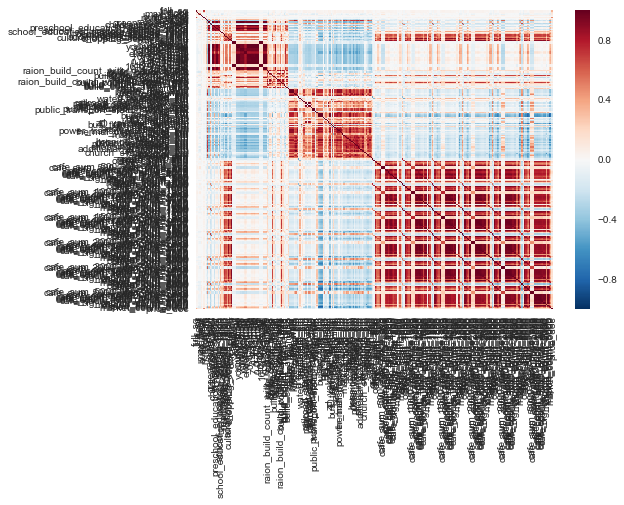

In [7]:

# calculate the correlation matrix
corr = train_raw.corr()

# plot the heatmap
sns.heatmap(corr)

In [8]:
train_raw.columns.get_loc('price_doc') #price_doc has index of 290

290

<br>
<br>
<br>
<p><a name=sumstat></a><p>

## Summary Statistics

In [9]:
train_raw['price_doc'].describe() #Summary for target feature

count    3.047100e+04
mean     7.123035e+06
std      4.780111e+06
min      1.000000e+05
25%      4.740002e+06
50%      6.274411e+06
75%      8.300000e+06
max      1.111111e+08
Name: price_doc, dtype: float64

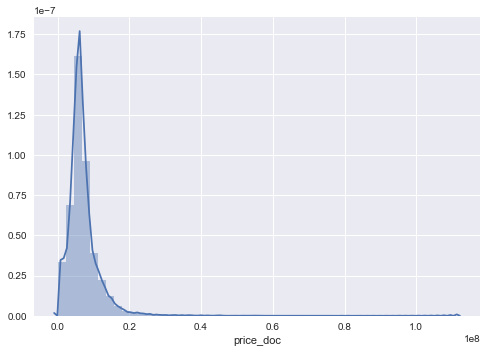

In [10]:
sns.distplot(train_raw['price_doc'])

<a name=td></a>

## Train Distance Subset

In [11]:
train_dist = train_raw.iloc[:, np.r_[290,0,86:152]] #Subsetting 
train_dist.head()

,price_doc,timestamp,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,...,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology
id,,,,,,,,,,,,,,,,,,,,,
1,5850000,2011-08-20,13.575119,1.131260,0.145700,0.177975,2.158587,0.600973,1.080934,23.683460,...,0.947962,0.177975,0.625783,0.628187,3.932040,14.053047,7.389498,7.023705,0.516838,good
2,6000000,2011-08-23,7.620630,0.635053,0.147754,0.273345,0.550690,0.065321,0.966479,1.317476,...,1.072315,0.273345,0.967821,0.471447,4.841544,6.829889,0.709260,2.358840,0.230287,excellent
3,5700000,2011-08-27,17.351515,1.445960,0.049102,0.158072,0.374848,0.453172,0.939275,4.912660,...,0.391957,0.158072,3.178751,0.755946,7.922152,4.273200,3.156423,4.958214,0.190462,poor
4,13100000,2011-09-01,11.565624,0.963802,0.179441,0.236455,0.078090,0.106125,0.451173,15.623710,...,0.892674,0.236455,1.031777,1.561505,15.300449,16.990677,16.041521,5.029696,0.465820,good
5,16331452,2011-09-05,8.266305,0.688859,0.247901,0.376838,0.258289,0.236214,0.392871,10.683540,...,0.810801,0.376838,0.378756,0.121681,2.584370,1.112486,1.800125,1.339652,0.026102,excellent


In [12]:
train_dist.describe()

,price_doc,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km
count,3.047100e+04,30446.000000,30446.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000
mean,7.123035e+06,42.737601,3.561467,0.981684,1.323956,3.099942,0.300511,0.768831,11.167613,2.314765,...,2.010973,1.328488,1.345235,2.330047,0.972014,7.739237,9.638074,7.063236,5.552256,0.687988
std,4.780111e+06,69.303131,5.775261,2.121956,3.058145,3.965363,0.298402,0.717953,7.036351,1.451071,...,2.306446,1.526219,3.053600,2.986937,0.748876,5.780424,7.112284,5.702807,5.304206,0.832922
min,1.000000e+05,0.000000,0.000000,0.000470,0.000000,0.003737,0.000000,0.000000,0.274139,0.000000,...,0.000000,0.000000,0.000000,0.004072,0.000000,0.005545,0.026788,0.007903,0.008949,0.000357
25%,4.740002e+06,11.484150,0.957013,0.199946,0.269716,0.973297,0.100951,0.288289,5.304559,1.334801,...,0.555231,0.474842,0.285124,0.860469,0.532480,3.766071,4.225254,2.879357,2.243788,0.208621
50%,6.274411e+06,20.447209,1.703934,0.353762,0.474862,1.803889,0.214336,0.576464,10.378040,1.968520,...,1.052999,0.899034,0.493048,1.490794,0.860037,6.543563,8.612007,5.643495,4.106649,0.412701
75%,8.300000e+06,45.322032,3.776836,0.971417,0.886531,3.404787,0.415498,1.041085,16.791370,3.089480,...,3.046687,1.571062,0.936324,2.922264,1.248480,10.047046,13.459593,10.328587,6.968701,0.841418
max,1.111111e+08,711.215806,59.267984,29.085774,47.394706,47.351538,1.982448,14.048162,47.591240,15.778710,...,18.958933,24.268209,47.394706,45.669060,15.615728,44.849832,87.600690,59.203148,54.431244,12.162697


<br>
<br>
<br>
<p><a name="td_mlr"></a></p>
## <span style="color:blue">Multiple Linear Regression for Train_Distance </span>

<br>
Selecting subset of the table with distance columns from training set:

In [13]:
##### Extracting and storing price from train_dist subset before excluding it from the frame for regression
price = train_dist['price_doc']
train_dist_num = train_dist._get_numeric_data()
train_dist_num = train_dist_num.iloc[:,1:]

** Imputer **

In [14]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median')
tdimp = imputer.fit_transform(train_dist_num)
tdimp_df = pd.DataFrame(tdimp)
tdimp_df.columns = train_dist_num.columns

print "Numerical Column Dimensions for Distance Subset:", train_dist_num.shape
print "Dimension Check after Imputed Values:", tdimp.shape
print "Dimension Check for Imputed Data Frame:", tdimp_df.shape

Numerical Column Dimensions for Distance Subset: (30471, 62)
Dimension Check after Imputed Values: (30471L, 62L)
Dimension Check for Imputed Data Frame: (30471, 62)



<br>
**Removing Features with Variance Less Than 1**
<br>


In [15]:
import sklearn.feature_selection as fs


selector = fs.VarianceThreshold(1)
selector.fit_transform(tdimp_df)
idxs_selected = selector.get_support(indices=True)
tdimp_df = tdimp_df.iloc[:,idxs_selected]



In [16]:
# def VTselect(data):
#     columns = data.columns
#     selector = fs.VarianceThreshold(1)
#     selector.fit_transform(data)
#     labels = [columns[x] for x in selector.get_support(indices=True) if x]
#     return pd.DataFrame(selector.fit_transform(data), columns=labels)

In [17]:

# #Implementing VarianceThreshold_selector  function from StackOverflow to retain column names after applying threshold
# #Source: https://stackoverflow.com/questions/39812885/retain-feature-names-after-scikit-feature-selection

# def VTselect(data):

#     #Select Model
#     selector = fs.VarianceThreshold(threshold=1)
#     #Fit the Model
#     selector.fit(data)
#     features = selector.get_support(indices = True) #returns an array of integers corresponding to nonremoved features
#     features = [column for column in data[features]] #Array of all nonremoved features' names

#     #Format and Return
#     selector = pd.DataFrame(selector.transform(data))
#     selector.columns = features
#     return selector


In [18]:
print "Imputed Frame Dimensions after Variance Control:", tdimp_df.shape #Should be less than 62 columns afterwards


Imputed Frame Dimensions after Variance Control: (30471, 57)


<br>
<p><a name="td_mlr_coef"></a></p>

 ### <span style="color:red">[MLR] Coefficients </span>

<br>

In [19]:
linear = linear_model.LinearRegression()

linear.fit(tdimp_df, price)

linear_df = pd.DataFrame(linear.coef_)
linear_df.columns = ['coef']

# print linear_df[abs(linear_df.coef) > 1e-5]  Unused
best_coef = linear_df[abs(linear_df.coef) > 1e+4] 
print best_coef

# best_coef.index #index for columns that meet the criteria in MLR

            coef
0  -4.156414e+12
1   4.987696e+13
2   2.264533e+04
3   1.699424e+05
5  -1.103933e+05
6   9.769334e+04
7  -7.586515e+04
8  -3.894751e+13
9   3.245626e+12
11  9.931697e+04
12  5.379190e+04
14  1.077764e+12
15 -8.981363e+10
16 -1.893249e+05
17  8.424057e+05
18 -3.800281e+06
19  8.916054e+05
20  1.495129e+06
21 -8.112552e+04
22  1.136733e+04
23 -5.300718e+04
25  4.612276e+05
27 -1.017148e+04
28 -1.958721e+04
29  3.413999e+04
30  3.330956e+05
32 -2.476234e+05
33  1.952452e+05
34  8.727339e+04
35  2.422605e+05
36  3.319464e+04
37 -3.487322e+04
38 -7.945664e+04
39 -7.817812e+04
40  3.893654e+04
41  3.335997e+04
42 -7.584135e+04
43  1.623031e+05
44 -8.963217e+04
45  9.432000e+04
46  1.239443e+05
47 -2.502230e+04
48 -1.592078e+05
49  6.468199e+04
50 -1.382405e+05
51  6.251287e+04
52 -1.609133e+05
53  1.379132e+05
54 -6.832469e+04
55 -6.910905e+04
56  2.485395e+05


In [20]:
#Index in linear_df should be the same as the tdimp dataframe, and by extension, the train_dist_num frame.
train_dist_num.columns[11]
a = tdimp_df.iloc[:,np.r_[best_coef.index]] #Using the index from linear_df to get variable name from train_dist_num
best_coef['Variable'] = a.columns
print("The determination of this regression is: %.4f" %linear.score(tdimp_df, price))
print("RSS: %.2f" % np.sum((price - linear.predict(tdimp_df)) ** 2))
print("MSE:", np.mean((linear.predict(tdimp_df).astype('float64') - price) ** 2)) #1.869365637e+13, probably shouldn't use




The determination of this regression is: 0.1818


D:\Anaconda\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


RSS: 569638058938923584.00
('MSE:', 18694432704503.414)


In [21]:
#Predictions
linear.predict(tdimp_df)

array([ 7289706.8658458 ,  7628144.8669166 ,  6915236.92108682, ...,
        6562214.09814284,  9081282.51441488,  6265741.61769759])

In [22]:
#Frame of Variables/Features and their coefficients
# best_coef[['Variable','coef']]

<br>
<p><a name="td_mlr_coef_dist_log"></a></p>
### <span style="color:red">[MLR] Coefficients (Log Price) </span>

<br>

In [23]:


linear2 = linear_model.LinearRegression()

linear2.fit(tdimp_df, np.log(price))

linear_df2 = pd.DataFrame(linear2.coef_)
linear_df2.columns = ['coef']
# print linear_df2[abs(linear_df2.coef) == 1]

best_coef_log = linear_df2[abs(linear_df2.coef) > 1e-1]
a_log = tdimp_df.iloc[:,np.r_[best_coef_log.index]]


print("The determination of this regression is: %.4f" %linear2.score(tdimp_df, np.log(price)))
print("RSS: %.2f" % np.sum((np.log(price) - linear2.predict(tdimp_df)) ** 2))

best_coef_log['Variable'] = a_log.columns



# np.sum((linear2.predict(tdimp_df) - np.log(price))^2)
print "MSE:", np.mean((linear2.predict(tdimp_df).astype('float64') - np.log(price)) ** 2)
best_coef_log[['Variable','coef']]

The determination of this regression is: 0.1286
RSS: 9704.74
MSE: 0.318491051895


D:\Anaconda\lib\site-packages\ipykernel\__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Variable,coef
0,metro_min_walk,-1.166547e+06
1,metro_km_walk,1.399856e+07
8,railroad_station_walk_km,-2.389634e+06
9,railroad_station_walk_min,1.991362e+05
14,public_transport_station_km,-1.976538e+05
15,public_transport_station_min_walk,1.647115e+04
18,sadovoe_km,-3.205642e-01
19,bulvar_ring_km,1.094112e-01
20,kremlin_km,1.003469e-01


In [24]:
#Predctions
np.exp(linear2.predict(tdimp_df))

array([ 6151048.82540418,  7058928.11257337,  6217274.98482861, ...,
        6274656.76373633,  7007493.0277535 ,  5370636.14248468])

In [25]:
list(best_coef_log['Variable']) #Variables to be exported

[u'metro_min_walk',
 u'metro_km_walk',
 u'railroad_station_walk_km',
 u'railroad_station_walk_min',
 u'public_transport_station_km',
 u'public_transport_station_min_walk',
 u'sadovoe_km',
 u'bulvar_ring_km',
 u'kremlin_km']

<br>
<br>
<br>
<p><a name="td_lasso"></a></p>
## <span style="color:blue">Lasso Regression </span>

<br>


<p><a name="td_lasso_coef"></a></p>
### <span style="color:red">[Lasso] Coefficients</span>

In [26]:
lasso = linear_model.Lasso() # create a lasso instance
lasso.get_params()


{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [27]:
lasso.fit(tdimp_df, price) # fit data
print("The determination of this regression is: %.4f" %lasso.score(tdimp_df, price))
print "MSE:", np.mean((lasso.predict(tdimp_df).astype('float64') - price) ** 2)
print "Intercept: ", lasso.intercept_ # print out the coefficients

lasso_df = pd.DataFrame(lasso.coef_[abs(lasso.coef_) > 1e4])
lasso_df.columns = ['coef']
print lasso_df.index



The determination of this regression is: 0.1760
MSE: 1.88274026483e+13
Intercept:  8005971.0235
RangeIndex(start=0, stop=48, step=1)


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [28]:
lasso_subset = tdimp_df.iloc[:,np.r_[lasso_df.index]]
lasso_df['Variable'] =lasso_subset.columns
print lasso_subset.shape
lasso_df[['Variable','coef']]


(30471, 48)


,Variable,coef
0,metro_min_walk,-1.369734e+04
1,metro_km_walk,-1.091276e+04
2,kindergarten_km,6.196044e+04
3,school_km,-1.061953e+05
4,park_km,3.345604e+04
5,water_treatment_km,-5.021862e+04
6,cemetery_km,-2.446197e+05
7,incineration_km,1.140908e+05
8,railroad_station_walk_km,4.911151e+04
9,railroad_station_walk_min,2.937485e+05



<p><a name="td_lasso_coef_log"></a></p>
### <span style="color:red">[Lasso] Coefficients (Log Price)</span>

In [29]:
lasso_log = linear_model.Lasso()
lasso_log.fit(tdimp_df,np.log(price))

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [30]:
# tdimp_log = np.log(tdimp)


print("The determination of this regression is: %.4f" %lasso.score(tdimp_df, np.log(price))) 
print "MSE:", np.mean((lasso_log.predict(tdimp_df).astype('float64') - np.log(price)) ** 2)
print "Intercept: ", lasso_log.intercept_ # print out the coefficients

# pd.DataFrame(lasso_log.coef_[abs(lasso_log.coef_) > 0]) returns non-zero coefficients under lasso with log price

lassolog_df = pd.DataFrame(lasso_log.coef_[abs(lasso_log.coef_) > 0])
lassolog_df.columns = ['coef']
lassolog_df.index

lassolog_subset = tdimp_df.iloc[:,np.r_[lassolog_df.index]]
# a_log.columns
lassolog_df['Variable'] = lassolog_subset.columns
lassolog_df[['Variable','coef']]



The determination of this regression is: -149103376839047.5938
MSE: 0.34934507948
Intercept:  15.6834462681


,Variable,coef
0,metro_min_walk,-0.001456
1,metro_km_walk,-0.000423
2,kindergarten_km,0.000204


**Sample Output for Lasso Model Prediction after reversing natural log of price**

In [31]:
np.exp(lasso_log.predict(tdimp_df))

array([ 6304263.21103211,  6334609.3861583 ,  6278888.50141213, ...,
        6227989.98365082,  6071746.03224658,  6363997.22324576])

** (WIP) Plot

In [32]:
alphas_lasso = np.logspace(-2, 10, 200)
coef_lasso = []


for i in alphas_lasso:
    lasso_log.set_params(alpha=i).fit(tdimp_df,np.log(price))
    coef_lasso.append(lasso.coef_)

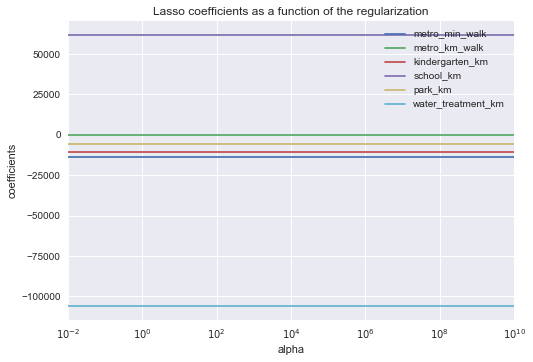

In [33]:

df_coef = pd.DataFrame(coef_lasso, index=alphas_lasso, columns=tdimp_df.columns)
df_coef_sub = df_coef.iloc[:,0:6]
title = 'Lasso coefficients as a function of the regularization'
df_coef_sub.plot(logx=True, title=title)
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.show()

<br>

**Make sure to remember this is predicting log price so you have to unlog it to get proper prediction of price**

<br>


<br>
<br>
<br>
<p><a name="td_tree"></a></p>
## <span style="color:blue">Decision Tree for Train_Distance </span>

<br>


In [ ]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier()
from sklearn import datasets


Trying Decision Tree Model on the Imputed Numerical Subset of the Distance Data

In [ ]:
tree_model.fit(tdimp_df, price)

In [ ]:
print "Score:", tree_model.score(tdimp_df,price)
# train_error = (1 - tree_model.score(tdimp_df, price))
# print "Error:", train_error
# test_error = (1 - tree_model.score(test_raw,price))
# print("The training error is: %.5f" %train_error)
# print("The test     error is: %.5f" %test_error)

<br>
<br>
<br>
<p><a name="full_train"></a></p>
## Full Training Dataset

<br>





<br>
<p><a name="ft_lasso"></a></p>
## <span style="color:blue">Lasso Regression (Log Price) </span>

<br>

In [ ]:
##### Extracting and storing price from train_dist subset before excluding it from the frame for regression
price = train_raw['price_doc']
train_num = train_raw.select_dtypes(['number'])
train_num = train_num.iloc[:,:-1]


** Imputer **

In [ ]:
train_imp = imputer.fit_transform(train_num)
train_imp_df = pd.DataFrame(train_imp)
train_imp_df.columns = train_dist_num.columns

print "Numerical Column Dimensions for Distance Subset:", train_dist_num.shape
print "Dimension Check after Imputed Values:", train_imp.shape
print "Dimension Check for Imputed Data Frame:", train_imp_df.shape


<br>
**Removing Features with Variance Less Than 1**
<br>


In [ ]:
import sklearn.feature_selection as fs


selector = fs.VarianceThreshold(1)
selector.fit_transform(tdimp_df)
idxs_selected = selector.get_support(indices=True)
tdimp_df = tdimp_df.iloc[:,idxs_selected]



<br>
<br>
<br>
# <span style="color:green"> TEST AREA</span>
<br>
<br>
<br>

In [ ]:
test_raw.dtypes.unique() #Look for the numerical types to impute on
test_columns_num = test_raw.select_dtypes(include=['float64','int64']).columns

test_imp = imputer.fit_transform(test_raw.loc[:, test_columns_num])
test_imp_df = pd.DataFrame(test_imp)
test_imp_df.columns = test_columns_num

test_imp_df = 



# test_imp_df.columns = test_raw.columns
# test_raw.loc[:, test_raw.dtypes == np.float64] = test_imp_df

# print "Numerical Column Dimensions for Distance Subset:", test_imp_df.shape
# print "Dimension Check after Imputed Values:", test_imp_df.shape
# print "Dimension Check for Imputed Data Frame:", test_imp_df.shape

In [ ]:
train_final = pd.read_csv(os.path.join('train_final.csv'),
                        encoding="utf-8-sig",
                        header='infer', 
                        index_col='id',
                        parse_dates=['timestamp'])